<a href="https://colab.research.google.com/github/SweathaPappachan/DTTE-SweathaPappachan/blob/main/DTTE_Tutorial_30_using_MLP_for_multiclass_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


## Neural Networks
## Using MLP for multiclass classification




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

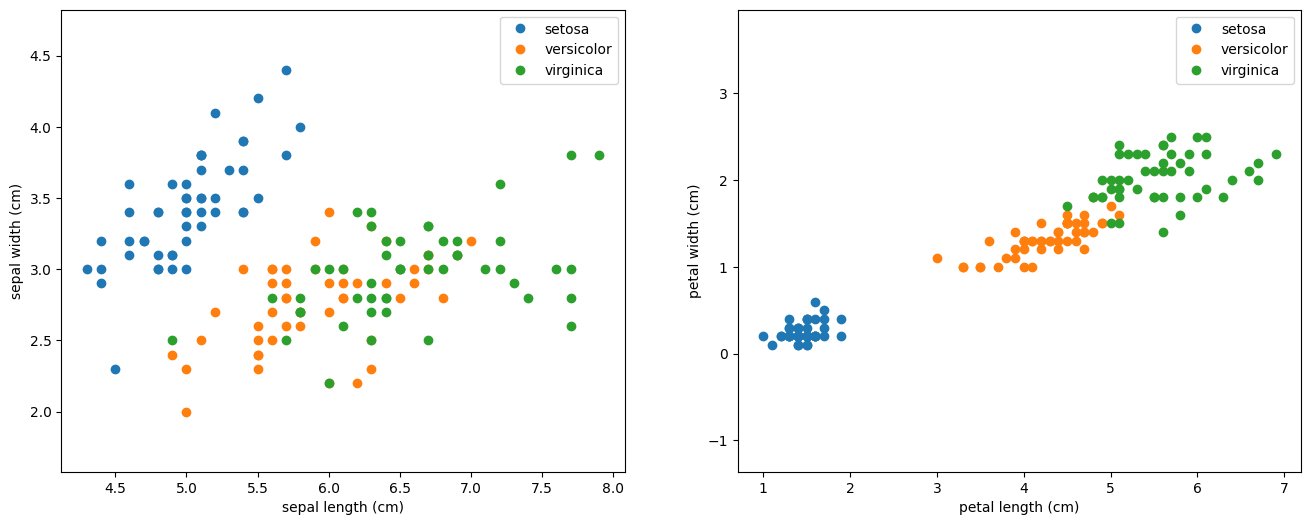

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:00<00:00, 274.01it/s]


# Plot training progress

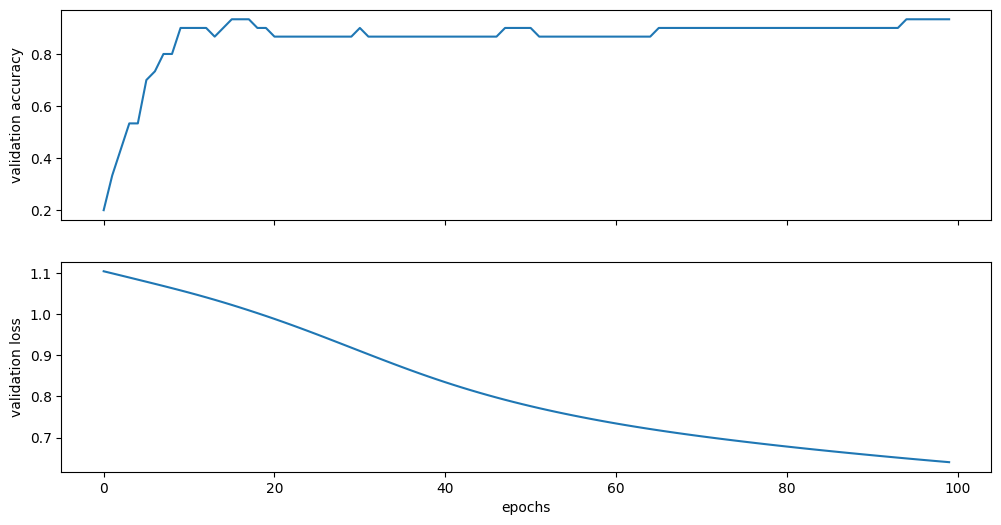

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture

1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.

Can you observe any changes?
4. How does changing the learning rate (lr) of the optimizer (e.g., increasing or decreasing it) affect the training and convergence of the model? What is the impact on accuracy and loss over the training epochs?

5. Explore the effect of using different batch sizes during training. Does increasing or decreasing the batch size influence the convergence speed and final model performance? How does it impact memory usage during training?

#SOLUTION

#1

In [9]:
class Model_(nn.Module):
    def __init__(self, input_dim):
        super(Model_, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 50)
        self.layer4 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.softmax(self.layer4(x), dim=1)
        return x

model_ = Model_(X_train.shape[1])
print(model_)

Model_(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=50, bias=True)
  (layer4): Linear(in_features=50, out_features=3, bias=True)
)


In [10]:
epoch = 5000

loss_list     = np.zeros((epoch,))
accuracy_list = np.zeros((epoch,))

for epoch in tqdm.trange(epoch, desc='epochs'):
    y_pred = model_(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model_(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

print( '\n\nMininum Loss: ', min(loss_list), '\nMaximum Accuracy: ', max(accuracy_list)*100)

epochs: 100%|██████████| 5000/5000 [00:05<00:00, 879.92it/s]



Mininum Loss:  1.095471978187561 
Maximum Accuracy:  26.66666805744171


#2

In [11]:
class Model_(nn.Module):
    def __init__(self, input_dim):
        super(Model_, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 112)
        self.layer3 = nn.Linear(112, 140)
        self.layer4 = nn.Linear(140, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.relu(self.layer3(x))
        x = F.softmax(self.layer4(x), dim=1)
        return x

model_ = Model_(X_train.shape[1])
print(model_)

Model_(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=112, bias=True)
  (layer3): Linear(in_features=112, out_features=140, bias=True)
  (layer4): Linear(in_features=140, out_features=3, bias=True)
)


In [12]:
epoch = 5000

loss_list     = np.zeros((epoch,))
accuracy_list = np.zeros((epoch,))

for epoch in tqdm.trange(epoch, desc='epochs'):
    y_pred = model_(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model_(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

print( '\n\nMininum Loss: ', min(loss_list), '\nMaximum Accuracy: ', max(accuracy_list)*100)

epochs: 100%|██████████| 5000/5000 [00:12<00:00, 395.42it/s]



Mininum Loss:  1.100633144378662 
Maximum Accuracy:  46.666666865348816


#3

In [13]:
class Model_(nn.Module):
    def __init__(self, input_dim):
        super(Model_, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.tanh(self.layer1(x))
        x = F.tanh(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

model_ = Model_(X_train.shape[1])
print(model_)


Model_(
  (layer1): Linear(in_features=4, out_features=50, bias=True)
  (layer2): Linear(in_features=50, out_features=50, bias=True)
  (layer3): Linear(in_features=50, out_features=3, bias=True)
)


In [14]:
epoch = 5000

loss_list     = np.zeros((epoch,))
accuracy_list = np.zeros((epoch,))

for epoch in tqdm.trange(epoch, desc='epochs'):
    y_pred = model_(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model_(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

print( '\n\nMininum Loss: ', min(loss_list), '\nMaximum Accuracy: ', max(accuracy_list)*100)

epochs: 100%|██████████| 5000/5000 [00:05<00:00, 874.17it/s]



Mininum Loss:  1.0833535194396973 
Maximum Accuracy:  66.66666865348816


#4

In [15]:
learning_rates = [0.0001, 0.01, 1, 10]
EPOCHS = 100

for lr in learning_rates:
    model = Model(X_train.shape[1])
    optimizer = torch.optim.Adam(model.parameters(), lr=lr)

    print(f'Learning Rate: {lr} \n', '='*25, '\n')

    loss_list = np.zeros((EPOCHS,))
    accuracy_list = np.zeros((EPOCHS,))

    for epoch in tqdm.trange(EPOCHS, desc='epochs'):
        y_pred = model(X_train)
        loss = loss_fn(y_pred, y_train)
        loss_list[epoch] = loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        with torch.no_grad():
            y_pred = model(X_test)
            correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
            accuracy_list[epoch] = correct.mean()

    print('\n\nMinimum Loss: ', min(loss_list), '\nMaximum Accuracy: ', max(accuracy_list) * 100, '\n')



Learning Rate: 0.0001 



epochs: 100%|██████████| 100/100 [00:00<00:00, 679.36it/s]




Minimum Loss:  1.0384541749954224 
Maximum Accuracy:  73.33333492279053 

Learning Rate: 0.01 



epochs: 100%|██████████| 100/100 [00:00<00:00, 813.03it/s]




Minimum Loss:  0.5603106021881104 
Maximum Accuracy:  93.33333373069763 

Learning Rate: 1 



epochs: 100%|██████████| 100/100 [00:00<00:00, 779.93it/s]




Minimum Loss:  0.901434063911438 
Maximum Accuracy:  73.33333492279053 

Learning Rate: 10 



epochs: 100%|██████████| 100/100 [00:00<00:00, 819.47it/s]



Minimum Loss:  0.934778094291687 
Maximum Accuracy:  66.66666865348816 



#5

In [16]:
# Batch Size = 32


epoch = 5000
batch_size = 32

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

loss_list     = np.zeros((epoch,))
accuracy_list = np.zeros((epoch,))
model = Model(X_train.shape[1])

for epoch in range(epoch):
  for i in range(0, (len(X_train)), batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]

    y_pred = model(X_batch)
    loss = loss_fn(y_pred, y_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()
        loss_list[epoch] = loss.item()

print('\n\nMinimum Loss: ', min(loss_list), '\nMaximum Accuracy: ', max(accuracy_list) * 100, '\n')



Minimum Loss:  1.068778395652771 
Maximum Accuracy:  46.666666865348816 



In [17]:
# Batch Size = 64


epoch = 5000
batch_size = 64

loss_list = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

loss_list     = np.zeros((epoch,))
accuracy_list = np.zeros((epoch,))
model = Model(X_train.shape[1])

for epoch in range(epoch):
  for i in range(0, (len(X_train)), batch_size):
    X_batch = X_train[i:i+batch_size]
    y_batch = y_train[i:i+batch_size]

    y_pred = model(X_batch)
    loss = loss_fn(y_pred, y_batch)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()
        loss_list[epoch] = loss.item()

print('\n\nMinimum Loss: ', min(loss_list), '\nMaximum Accuracy: ', max(accuracy_list) * 100, '\n')



Minimum Loss:  1.0953949689865112 
Maximum Accuracy:  26.66666805744171 

